# 🌾 Projeto de ML no Agronegócio (Implementação com Pipeline)
---
 
**Base de Dados:** `produtos_agricolas.csv`  

## 1. Objetivo

Este notebook implementa uma solução de Machine Learning para recomendação de culturas (`label`) com base em 7 variáveis de solo e clima.

**Diferencial Técnico:** Utilizaremos `Pipelines` do Scikit-learn para encapsular o pré-processamento (`StandardScaler`) e o treinamento de cada modelo, garantindo uma implementação robusta e profissional.

In [1]:
# =================================================================
# 1. Configuração e Carregamento (Arquivo: produtos_agricolas.csv)
# =================================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importações de ML (com Pipeline e Modelos Variados)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline # <-- A chave da nossa abordagem

# Nossos 5 Modelos
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import LinearSVC 

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Configuração de estilo para os gráficos
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# 1.1 Carregar o Dataset (Usando read_csv com o nome correto)
try:
    # Esta é a correção final: usamos o nome 'produtos_agricolas.csv'
    df = pd.read_csv('produtos_agricolas.csv')
    print(f"Dados Carregados com Sucesso! Formato: {df.shape}")
    print("\n--- Colunas encontradas ---")
    print(df.columns.tolist())
    
except FileNotFoundError:
    print("ERRO: Arquivo 'produtos_agricolas.csv' não encontrado.")
    print("Verifique se o arquivo está na mesma pasta que este notebook.")
    df = None
except Exception as e:
    print(f"Ocorreu um erro ao ler o arquivo: {e}")
    df = None

# 1.2 Verificação de Nulos
if df is not None:
    print("\n--- Verificação de Nulos ---")
    print(df.isnull().sum())

    # 1.3 Definição das Variáveis Alvo e Features
    # O nome da coluna alvo (target) neste dataset é 'label'
    NOME_DA_COLUNA_ALVO = 'label' 
    
    try:
        # Define a lista de colunas de features (as 7 variáveis)
        FEATURES = [col for col in df.columns if col != NOME_DA_COLUNA_ALVO]
        
        print(f"\n--- Distribuição da Coluna Alvo: '{NOME_DA_COLUNA_ALVO}' ---")
        print(df[NOME_DA_COLUNA_ALVO].value_counts())
        print(f"\n--- Colunas de Features (Variáveis): {FEATURES} ---")
    
    except KeyError:
        print(f"\n*** ERRO DE CHAVE (KeyError) ***")
        print(f"A coluna '{NOME_DA_COLUNA_ALVO}' não foi encontrada.")
        print("Verifique a lista 'Colunas encontradas' acima e edite a variável 'NOME_DA_COLUNA_ALVO' (linha 55) se necessário.")
        raise

Dados Carregados com Sucesso! Formato: (2200, 8)

--- Colunas encontradas ---
['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label']

--- Verificação de Nulos ---
N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

--- Distribuição da Coluna Alvo: 'label' ---
label
rice           100
maize          100
chickpea       100
kidneybeans    100
pigeonpeas     100
mothbeans      100
mungbean       100
blackgram      100
lentil         100
pomegranate    100
banana         100
mango          100
grapes         100
watermelon     100
muskmelon      100
apple          100
orange         100
papaya         100
coconut        100
cotton         100
jute           100
coffee         100
Name: count, dtype: int64

--- Colunas de Features (Variáveis): ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall'] ---


## 2. Análise Exploratória de Dados (EDA)

Vamos gerar 5 visualizações para entender os dados. Usaremos as variáveis `FEATURES` e `NOME_DA_COLUNA_ALVO` que definimos na célula anterior.

--- Gráfico 1: Matriz de Correlação ---


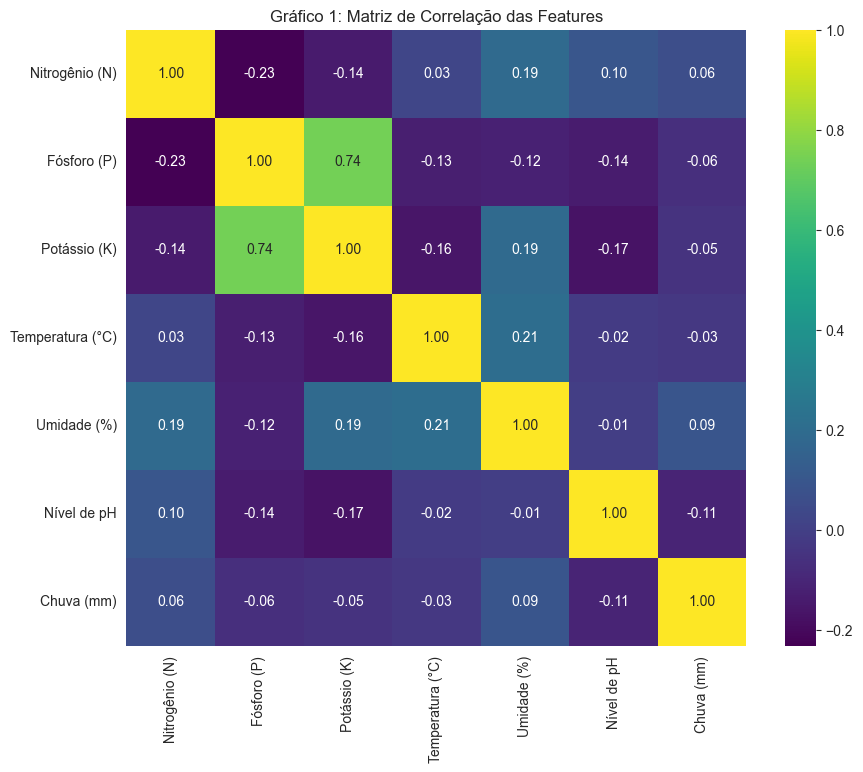


--- Gráfico 2: Distribuição de Todas as Variáveis Numéricas ---


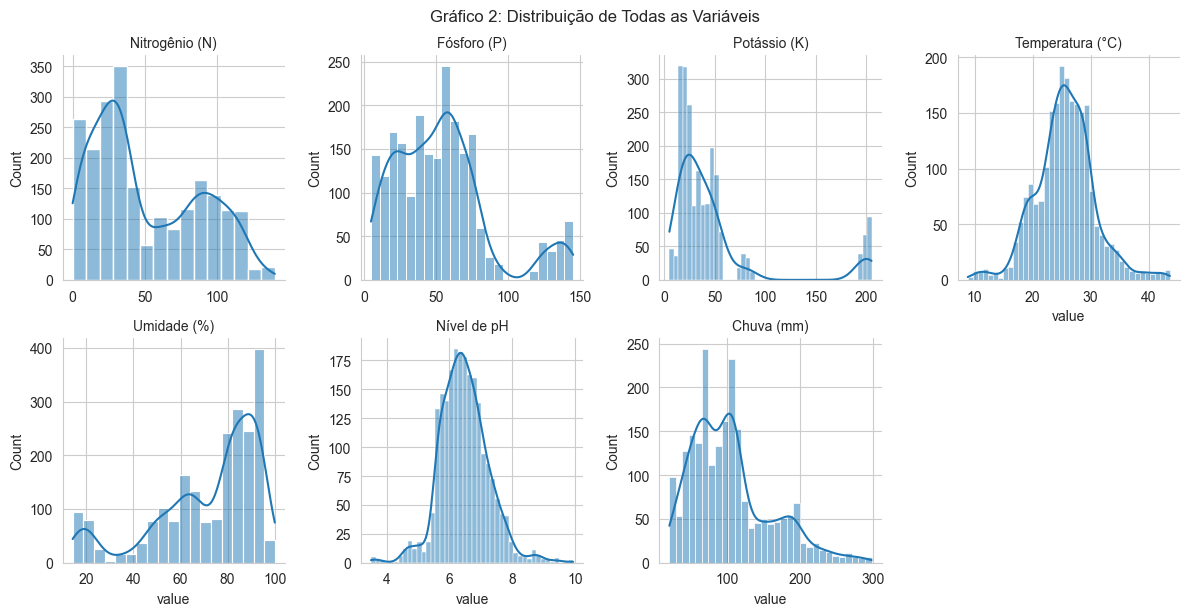


--- Gráfico 3: pH por Cultura ---


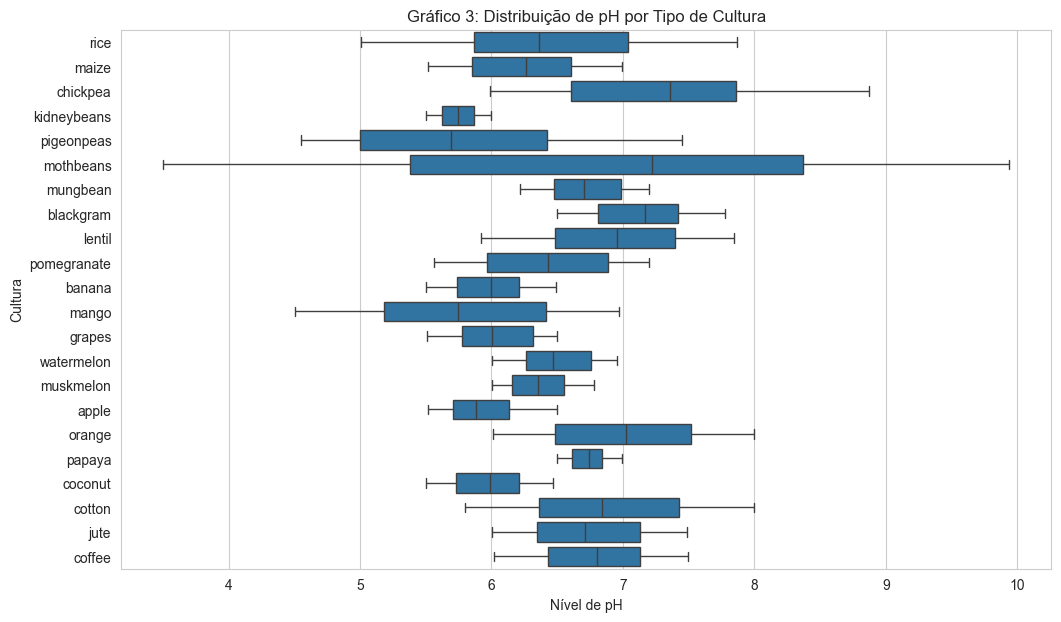


--- Gráfico 4: Nitrogênio (N) vs. Fósforo (P) ---


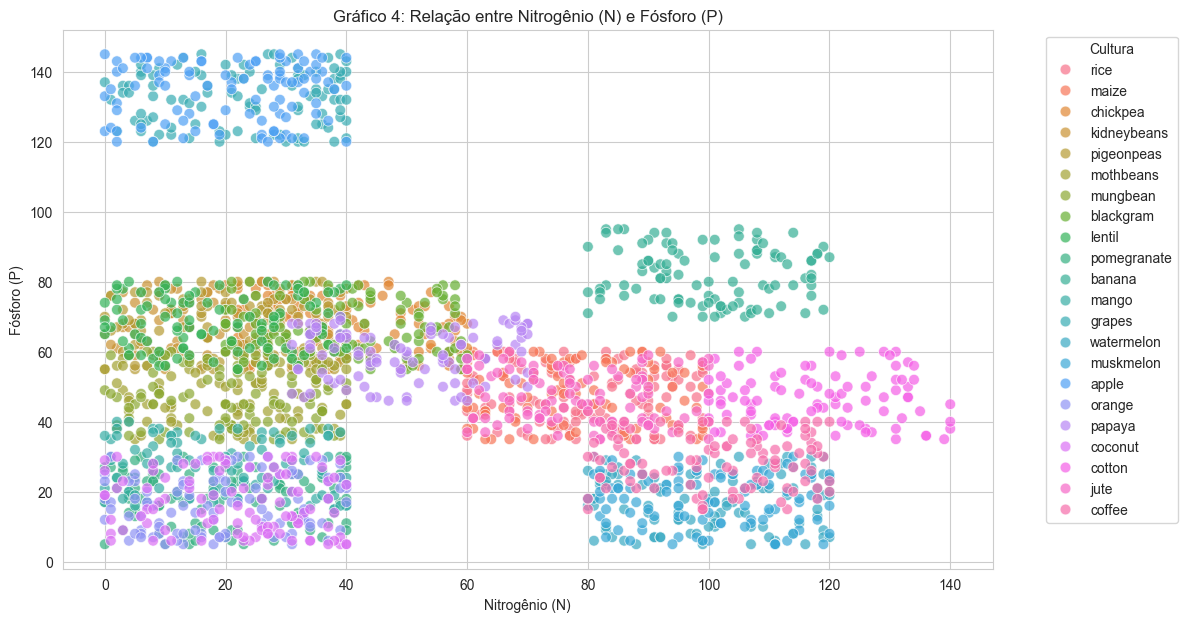


--- Gráfico 5: Pairplot de Variáveis Climáticas ---


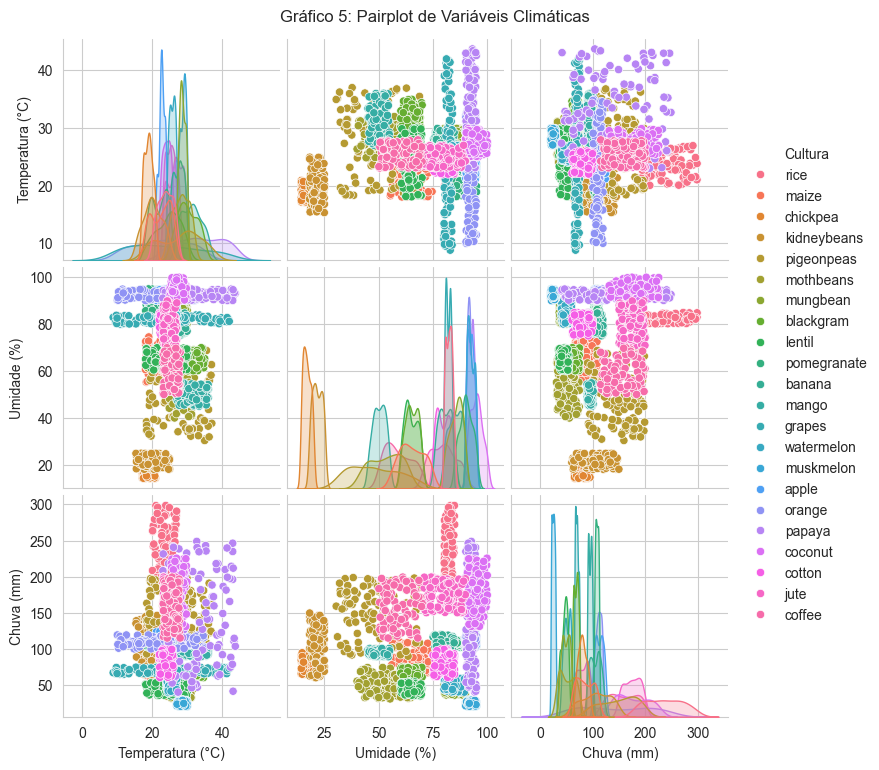

In [2]:
# =================================================================
# 2. Análise Exploratória de Dados (EDA) - 5 Gráficos (EM PORTUGUÊS)
# =================================================================
if df is not None and 'FEATURES' in locals():
    
    # --- DICIONÁRIO DE TRADUÇÃO ---
    # Mapeia os nomes das colunas (Inglês) para Português
    tradutor_colunas = {
        'N': 'Nitrogênio (N)',
        'P': 'Fósforo (P)',
        'K': 'Potássio (K)',
        'temperature': 'Temperatura (°C)',
        'humidity': 'Umidade (%)',
        'ph': 'Nível de pH',
        'rainfall': 'Chuva (mm)',
        NOME_DA_COLUNA_ALVO: 'Cultura' # Traduz a 'label'
    }

    # Gráfico 1: Matriz de Correlação (Heatmap)
    print("--- Gráfico 1: Matriz de Correlação ---")
    plt.figure(figsize=(10, 8)) # Aumentei o tamanho para caber os nomes
    
    # Criamos um DF temporário SÓ para o gráfico com nomes traduzidos
    df_traduzido_corr = df[FEATURES].rename(columns=tradutor_colunas)
    corr_matrix = df_traduzido_corr.corr()
    
    sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='viridis')
    plt.title('Gráfico 1: Matriz de Correlação das Features')
    plt.show()

    # Gráfico 2: Distribuição de Todas as Variáveis (Facetado)
    print("\n--- Gráfico 2: Distribuição de Todas as Variáveis Numéricas ---")
    
    # Renomeamos as colunas antes de "derreter" (melt) o DataFrame
    df_melted_traduzido = df.rename(columns=tradutor_colunas).melt(value_vars=[tradutor_colunas[f] for f in FEATURES])
    
    g = sns.FacetGrid(df_melted_traduzido, col="variable", col_wrap=4, sharex=False, sharey=False)
    g.map(sns.histplot, "value", kde=True)
    g.set_titles("{col_name}") # Agora os títulos das facetas estão em Português
    plt.suptitle('Gráfico 2: Distribuição de Todas as Variáveis', y=1.02)
    plt.show()

    # Gráfico 3: Relação entre pH e Culturas (Boxplot)
    print("\n--- Gráfico 3: pH por Cultura ---")
    plt.figure(figsize=(12, 7))
    sns.boxplot(x='ph', y=NOME_DA_COLUNA_ALVO, data=df)
    
    # Definimos os rótulos manualmente usando o tradutor
    plt.title('Gráfico 3: Distribuição de pH por Tipo de Cultura')
    plt.xlabel(tradutor_colunas['ph'])
    plt.ylabel(tradutor_colunas[NOME_DA_COLUNA_ALVO])
    plt.show()

    # Gráfico 4: Relação N vs P (Scatterplot)
    print("\n--- Gráfico 4: Nitrogênio (N) vs. Fósforo (P) ---")
    plt.figure(figsize=(12, 7))
    sns.scatterplot(x='N', y='P', hue=NOME_DA_COLUNA_ALVO, data=df, alpha=0.7, s=60)
    
    plt.title('Gráfico 4: Relação entre Nitrogênio (N) e Fósforo (P)')
    plt.xlabel(tradutor_colunas['N'])
    plt.ylabel(tradutor_colunas['P'])
    # Traduzindo o título da legenda
    plt.legend(title=tradutor_colunas[NOME_DA_COLUNA_ALVO], bbox_to_anchor=(1.05, 1), loc=2)
    plt.show()

    # Gráfico 5: Pairplot Focado (Clima)
    print("\n--- Gráfico 5: Pairplot de Variáveis Climáticas ---")
    
    # Renomeamos as colunas ANTES de passar para o Pairplot
    df_pairplot = df.rename(columns=tradutor_colunas)
    vars_clima_pt = [tradutor_colunas['temperature'], tradutor_colunas['humidity'], tradutor_colunas['rainfall']]
    
    sns.pairplot(df_pairplot, vars=vars_clima_pt, hue=tradutor_colunas[NOME_DA_COLUNA_ALVO])
    plt.suptitle('Gráfico 5: Pairplot de Variáveis Climáticas', y=1.02)
    plt.show()

else:
    print("Execute a Célula 2 primeiro.")

## 3. Identificação do "Perfil Ideal"

Calculamos a média das 7 variáveis (`FEATURES`) para **três culturas escolhidas** (agrupando pela `NOME_DA_COLUNA_ALVO`) para definir o perfil ótimo de plantio.

In [3]:
# =================================================================
# 3. Perfil Ideal de Solo/Clima (COM TRADUÇÃO)
# =================================================================
if df is not None:
    
    # (Copie o dicionário da Célula 4 se for rodar esta célula separadamente)
    tradutor_colunas = {
        'N': 'Nitrogênio (N)', 'P': 'Fósforo (P)', 'K': 'Potássio (K)',
        'temperature': 'Temperatura (°C)', 'humidity': 'Umidade (%)',
        'ph': 'Nível de pH', 'rainfall': 'Chuva (mm)',
        NOME_DA_COLUNA_ALVO: 'Cultura'
    }
    
    culturas_escolhidas = ['rice', 'maize', 'pomegranate'] # Exemplo

    # Calcula a média para TODAS as culturas
    perfil_ideal_geral = df.groupby(NOME_DA_COLUNA_ALVO)[FEATURES].mean().round(2)
    
    try:
        df_perfil = perfil_ideal_geral.loc[culturas_escolhidas]
        
        # Traduz as colunas (N, P, K...) para Português
        df_perfil_traduzido = df_perfil.rename(columns=tradutor_colunas)
        
        print(f"\n--- Perfil Ideal (Médias) para {culturas_escolhidas} ---")
        print(df_perfil_traduzido)
        
    except KeyError:
        print(f"\n*** ERRO ***: Uma das 'culturas_escolhidas' ({culturas_colhidas}) não existe.")
        print("Verifique os nomes na saída da Célula 2 e corrija a lista 'culturas_escolhidas'.")
        
else:
    print("Execute a Célula 2 primeiro.")


--- Perfil Ideal (Médias) para ['rice', 'maize', 'pomegranate'] ---
             Nitrogênio (N)  Fósforo (P)  Potássio (K)  Temperatura (°C)  \
label                                                                      
rice                  79.89        47.58         39.87             23.69   
maize                 77.76        48.44         19.79             22.39   
pomegranate           18.87        18.75         40.21             21.84   

             Umidade (%)  Nível de pH  Chuva (mm)  
label                                              
rice               82.27         6.43      236.18  
maize              65.09         6.25       84.77  
pomegranate        90.13         6.43      107.53  


## 4. Desenvolvimento de Modelos Preditivos (com Pipeline)

Iniciamos a modelagem de Machine Learning.

1.  Os dados são divididos em `X` (as `FEATURES`) e `y` (a `NOME_DA_COLUNA_ALVO`).
2.  Os dados são separados em Treino (80%) e Teste (20%).
3.  Criamos 5 `Pipelines`. Cada pipeline contém dois passos:
    * `('scaler', StandardScaler())`: Padroniza os dados.
    * `('model', Modelo())`: Treina o algoritmo (ex: RandomForest).

In [4]:
# =================================================================
# 4. Machine Learning (5 Modelos com Pipeline)
# =================================================================
if df is not None:
    # 1. Definição de X e y (usando as variáveis da Célula 2)
    X = df[FEATURES]
    y = df[NOME_DA_COLUNA_ALVO]

    # 2. Divisão Treino e Teste
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    # 3. Definição dos Pipelines
    
    pipeline_lr = Pipeline([
        ('scaler', StandardScaler()),
        ('model', LogisticRegression(max_iter=500, random_state=42))
    ])
    
    pipeline_knn = Pipeline([
        ('scaler', StandardScaler()),
        ('model', KNeighborsClassifier(n_neighbors=5))
    ])
    
    pipeline_rf = Pipeline([
        ('scaler', StandardScaler()),
        ('model', RandomForestClassifier(random_state=42))
    ])
    
    pipeline_gb = Pipeline([
        ('scaler', StandardScaler()),
        ('model', GradientBoostingClassifier(random_state=42))
    ])
    
    pipeline_lsvc = Pipeline([
        ('scaler', StandardScaler()),
        ('model', LinearSVC(random_state=42, max_iter=2000, dual=True))
    ])

    # Lista de pipelines para iterar
    pipelines = [pipeline_lr, pipeline_knn, pipeline_rf, pipeline_gb, pipeline_lsvc]
    
    # Dicionário para armazenar resultados
    resultados = {}
    
    # 4. Treinamento e Avaliação em Loop
    print("\n--- Iniciando Treinamento e Avaliação dos Pipelines ---")
    
    for pipe in pipelines:
        nome_modelo = pipe.steps[-1][1].__class__.__name__ 
        print(f"Treinando {nome_modelo}...")
        
        pipe.fit(X_train, y_train)
        y_pred = pipe.predict(X_test)
        
        acuracia = accuracy_score(y_test, y_pred)
        report = classification_report(y_test, y_pred, output_dict=True, zero_division=0)
        
        resultados[nome_modelo] = {
            'Acurácia': round(acuracia, 4),
            'F1-Score Médio': round(report['weighted avg']['f1-score'], 4)
        }
    
    print("--- Treinamento Concluído! ---")

else:
    print("Execute a Célula 2 primeiro.")


--- Iniciando Treinamento e Avaliação dos Pipelines ---
Treinando LogisticRegression...
Treinando KNeighborsClassifier...
Treinando RandomForestClassifier...
Treinando GradientBoostingClassifier...
Treinando LinearSVC...
--- Treinamento Concluído! ---


## 5. Avaliação Comparativa e Conclusão

Comparamos os resultados dos 5 pipelines no conjunto de teste (dados que os modelos nunca viram) para determinar o modelo mais preciso e robusto.

In [5]:
# =================================================================
# 5. Avaliação Comparativa (COM TRADUÇÃO)
# =================================================================
if 'resultados' in locals():
    # Cria um DataFrame com os resultados
    df_resultados = pd.DataFrame(resultados).T
    
    # Traduz as colunas do DataFrame de resultados
    df_resultados_traduzido = df_resultados.rename(columns={
        'Acurácia': 'Acurácia',
        'F1-Score Médio': 'F1-Score (Médio)'
    })
    
    # Traduz o índice (nome dos modelos) para nomes mais amigáveis
    df_resultados_traduzido.index.name = 'Algoritmo'
    df_resultados_traduzido = df_resultados_traduzido.rename(index={
        'LogisticRegression': 'Regressão Logística',
        'KNeighborsClassifier': 'KNN (Vizinhos)',
        'RandomForestClassifier': 'Random Forest',
        'GradientBoostingClassifier': 'Gradient Boosting',
        'LinearSVC': 'SVM Linear (SVC)'
    })
    
    print("\n--- Comparativo de Desempenho dos 5 Modelos (Pipelines) ---")
    print(df_resultados_traduzido.sort_values(by='Acurácia', ascending=False))

    # ================================================================
    # ↓↓↓↓ BLOCO DE CÓDIGO CORRIGIDO ↓↓↓↓
    # ================================================================
    
    # Conclusão Final
    print("\n--- Conclusão Final ---")
    
    # 1. Encontra o nome do melhor modelo JÁ TRADUZIDO (ex: 'Random Forest')
    melhor_modelo_traduzido = df_resultados_traduzido['Acurácia'].idxmax()
    
    # 2. Busca o valor da acurácia usando esse nome traduzido
    acuracia_valor = df_resultados_traduzido.loc[melhor_modelo_traduzido, 'Acurácia']
    
    print(f"O modelo com melhor desempenho no conjunto de teste é: {melhor_modelo_traduzido}")
    print(f"Acurácia: {acuracia_valor * 100:.2f}%")
    
    print("\nO uso de Pipelines garantiu que o pré-processamento foi aplicado corretamente.")
else:
    print("Execute as células anteriores para gerar os resultados.")


--- Comparativo de Desempenho dos 5 Modelos (Pipelines) ---
                     Acurácia  F1-Score (Médio)
Algoritmo                                      
Random Forest          0.9955            0.9955
Gradient Boosting      0.9886            0.9887
KNN (Vizinhos)         0.9795            0.9793
Regressão Logística    0.9727            0.9725
SVM Linear (SVC)       0.9591            0.9593

--- Conclusão Final ---
O modelo com melhor desempenho no conjunto de teste é: Random Forest
Acurácia: 99.55%

O uso de Pipelines garantiu que o pré-processamento foi aplicado corretamente.
